<a href="https://colab.research.google.com/github/Arkkhan603/TSFInternTasks/blob/main/TSF_Intern_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import plotly.express as px

##Loading Iris.csv Dataset

In [33]:
dt = pd.read_csv('https://raw.githubusercontent.com/Arkkhan603/TSFInternTasks/main/Iris.csv')

## Preprocessing data

In [34]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Splitting dataset into features and targets

In [36]:
X = dt.drop('Species', axis=1)
y = dt['Species']

##  Splitting the dataset into Testing and Training Data

In [49]:
X_tr,X_te,y_tr,y_te = tts(X,y,test_size=0.3,random_state=66)

## First Training Attempt

In [50]:
model = DecisionTreeClassifier()
model.fit(X_tr,y_tr)

DecisionTreeClassifier()

## Visualizing First Training Attempt

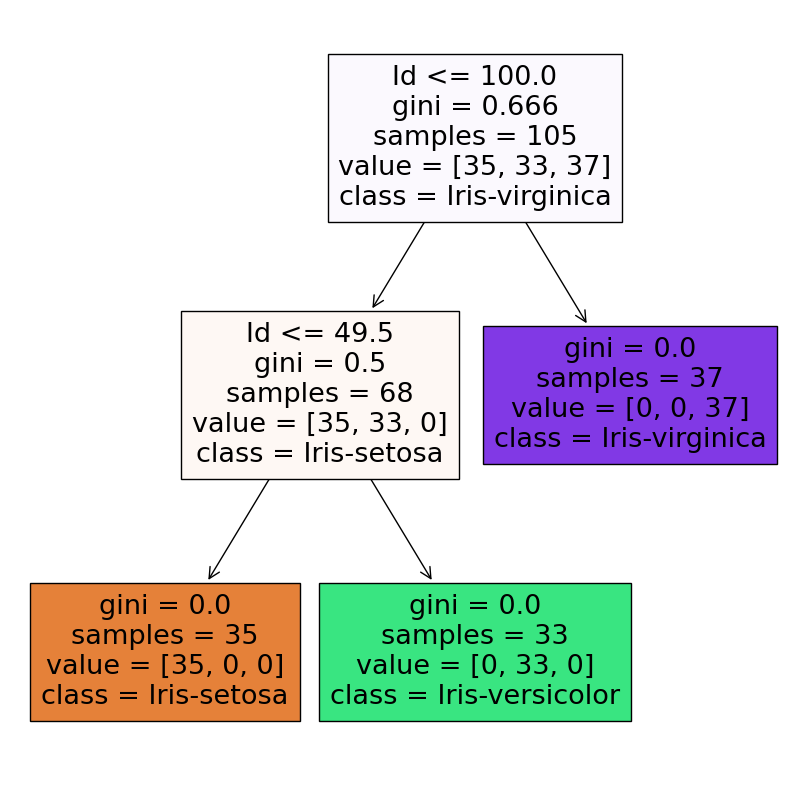

In [51]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=X.columns,class_names=y.unique(),filled=True)
plt.show()

# Testing

In [52]:
y_pd = model.predict(X_te)

In [53]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_te,y_pd)
report = classification_report(y_te, y_pd, target_names=y.unique())

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9777777777777777
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Second Training Attempt

In [54]:
model2 = DecisionTreeClassifier(random_state=42)

In [55]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [56]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [60]:
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_te, y_te)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9777777777777777


DecisionTreeClassifier(random_state=42)

The accuracy acheived even after cross-validation is 97.7%

## Visualizing Second Training Attempt

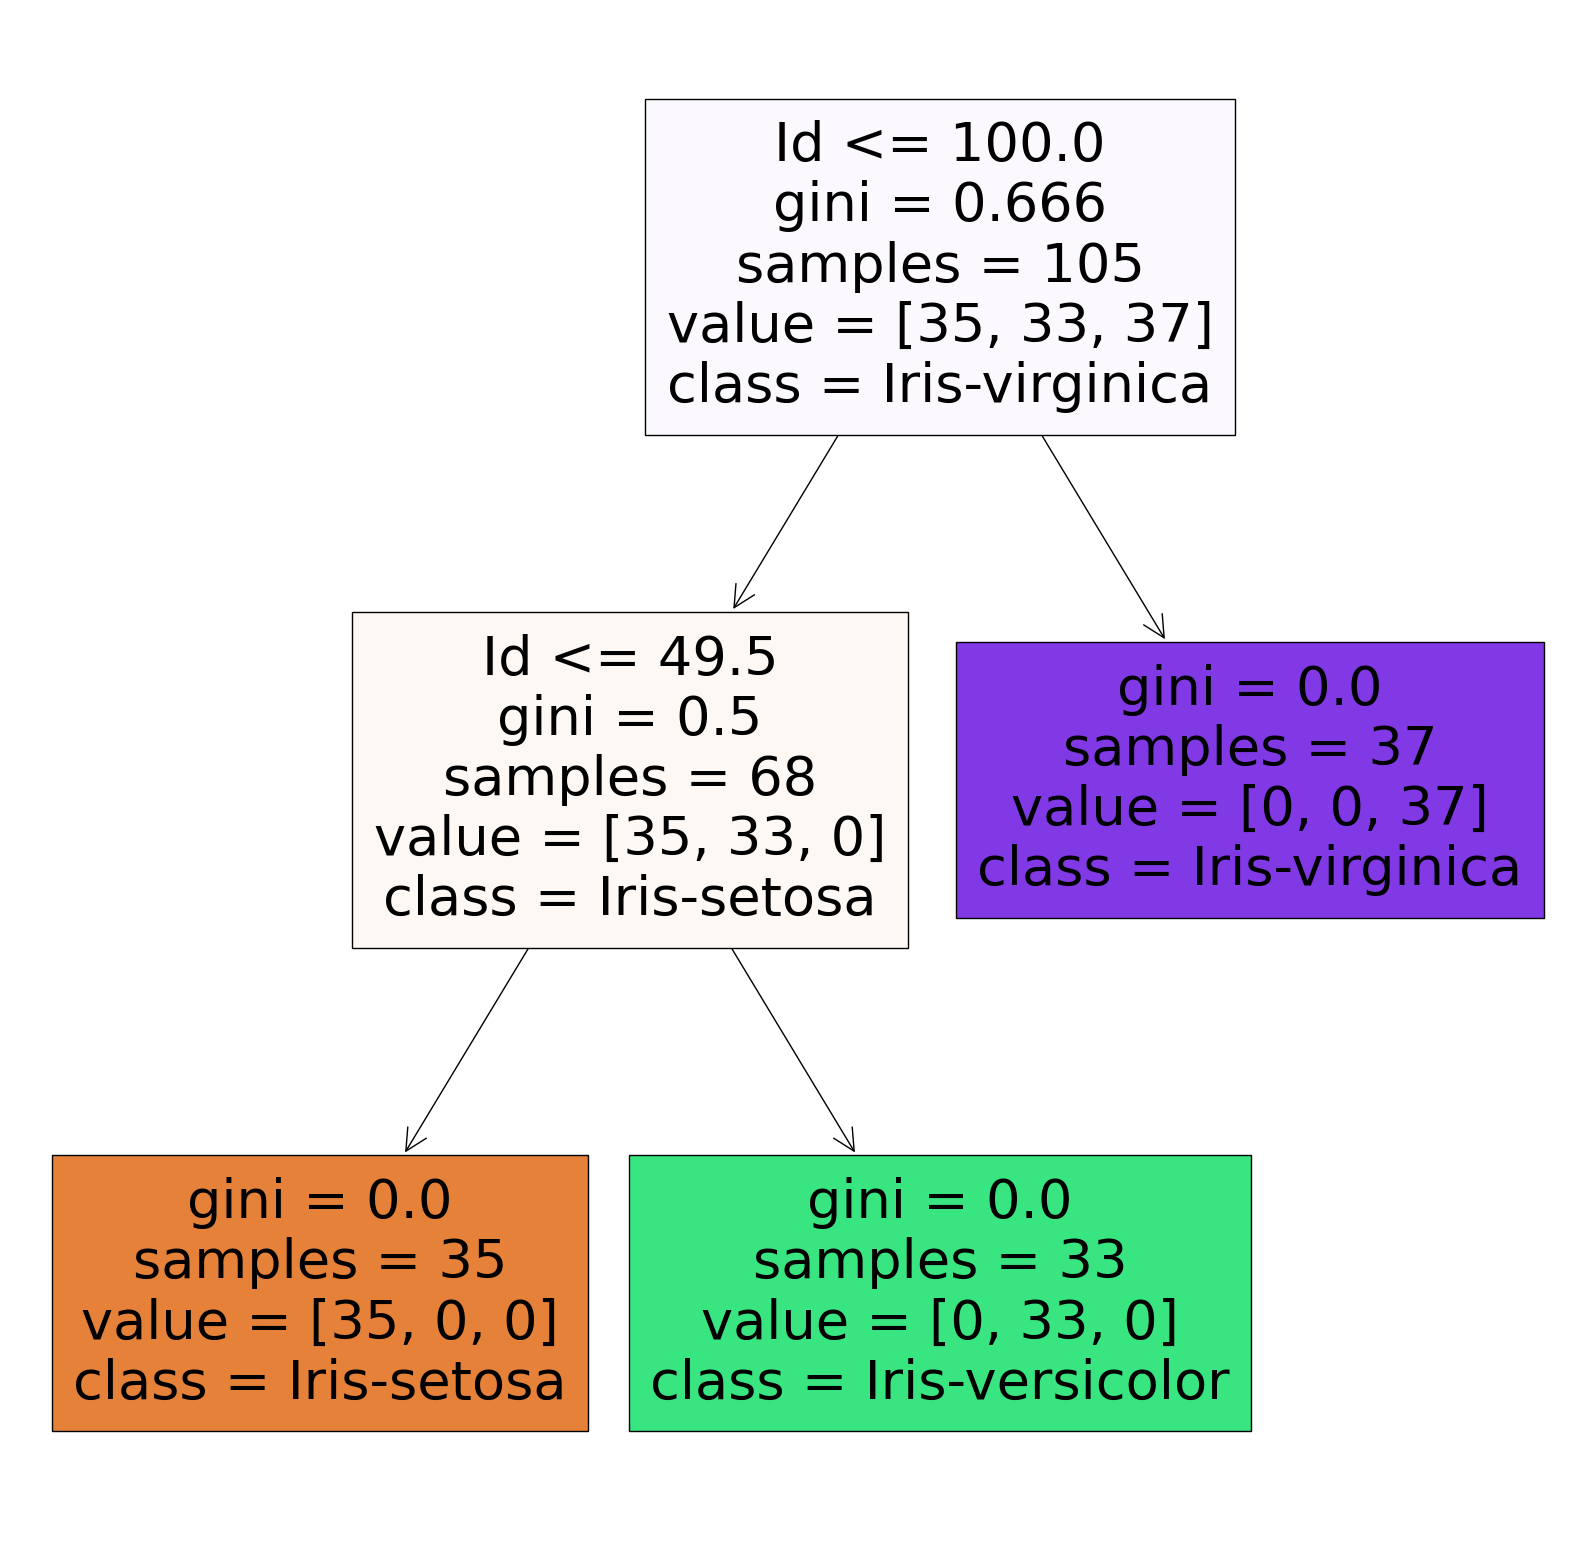

In [68]:
plt.figure(figsize=(20,20))
tree.plot_tree(model2,feature_names=X.columns,class_names=y.unique(),filled=True)
plt.show()